## Importing  Libraries


In [1]:
#import libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Importing the Dataset

In [2]:
data=pd.read_csv("C:\\Users\\DELL\\Downloads\\iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
#shape
data.shape

(150, 6)

In [7]:
#Drop a Column
data.drop(['Id'],axis=1,inplace=True)

In [8]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
#check the null values
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

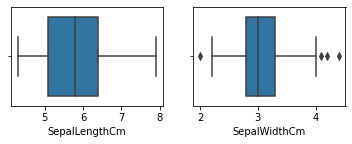

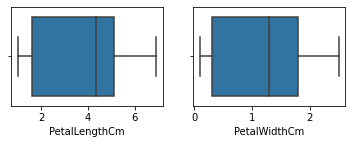

In [10]:
# check the outliers
plt.subplot(2,2,1)
sns.boxplot(data['SepalLengthCm'])
plt.subplot(2,2,2)
sns.boxplot(data['SepalWidthCm'])
plt.show()
plt.subplot(2,2,3)
sns.boxplot(data['PetalLengthCm'])
plt.subplot(2,2,4)
sns.boxplot(data['PetalWidthCm'])
plt.show()

In [11]:
#remove the outliers for SepalWidthCm
q3=data['SepalWidthCm'].quantile(0.75)
q1=data['SepalWidthCm'].quantile(0.25)
iqr=q3-q1
l_bound=q1 - (1.5*iqr)
u_bound=q3 + (1.5*iqr)
for v in data['SepalWidthCm']:
    if v <l_bound  or v >u_bound:
        data.loc[data['SepalWidthCm']==v,'SepalWidthCm'] = data['SepalWidthCm'].median()

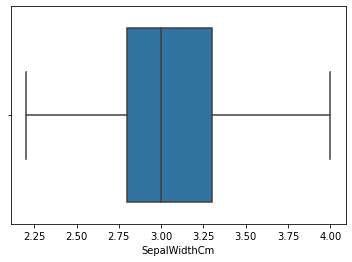

In [12]:
sns.boxplot(data['SepalWidthCm'])
plt.show()

## Data Visulization

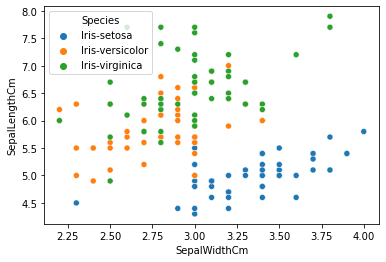

In [13]:
sns.scatterplot(x='SepalWidthCm',y='SepalLengthCm',hue='Species',data=data)
plt.show()

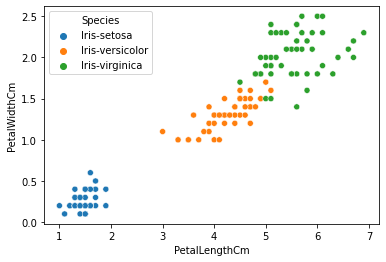

In [14]:
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',hue='Species',data=data)
plt.show()

In [15]:
le=LabelEncoder()
data['Species']=le.fit_transform(data['Species'])

## Spliting the data

In [16]:
x=data.iloc[:,:3].values
y=data.iloc[:,4].values
print(x.shape)
print(y.shape)

(150, 3)
(150,)


In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

## Apply the Logistic Regression

In [18]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [19]:
ypred=lg.predict(x_train)                                                     

In [20]:
#FOR TRAINING DATASET
accuracy=accuracy_score(y_train,ypred)
print("accuracy for training data",accuracy)

accuracy for training data 0.9666666666666667


In [22]:
# FOR TESTING DATASET
prediction_test=lg.predict(x_test)
accuracy=accuracy_score(y_test,prediction_test)
print("accuracy for testing data",accuracy)

accuracy for testing data 0.9666666666666667
